In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import matplotlib as mpl

save_figures = False
figure_path = "../figures/evaluation/"

In [2]:
import json

with open("../results/logistic_scores.json", "r") as readfile:
    logistic_scores = json.load(readfile)
    
with open("../results/svc_scores.json", "r") as readfile:
    svc_scores = json.load(readfile)
    
with open("../results/rfc_scores.json", "r") as readfile:
    rfc_scores = json.load(readfile)
    
with open("../results/knn_scores.json", "r") as readfile:
    knn_scores = json.load(readfile)
    
with open("../results/boost_scores.json", "r") as readfile:
    boost_scores = json.load(readfile)

In [3]:
df_scores = pd.DataFrame({"logi_no": logistic_scores['no']})

In [4]:
df_scores["logi_l1"] = logistic_scores['l1']
df_scores["logi_l2"] = logistic_scores['l2']
df_scores["logi_ela"] = logistic_scores['elastic']

df_scores["svc_lin"] = svc_scores['lin']
df_scores["svc_rbf"] = svc_scores['rbf']

df_scores["rfc"] = rfc_scores['rfc']

df_scores["knn"] = knn_scores['knn']

df_scores["Ada"] = boost_scores['Ada']
df_scores["grad"] = boost_scores['Gradient']
df_scores["xgb"] = boost_scores['XGB']

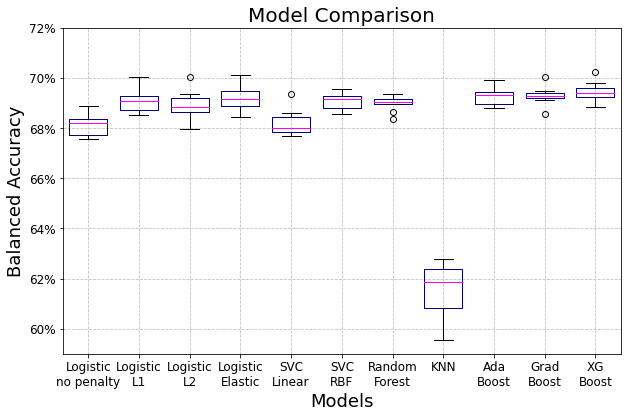

In [5]:
fig_box, ax_box = plt.subplots()
df_scores.boxplot(ax = ax_box, 
                  widths = 0.75,
                  boxprops = {'color':'navy'}, 
                  medianprops = {'color':'magenta'}, 
                  whiskerprops = {'color':'black'})

xtick_labels = ['Logistic\nno penalty', 'Logistic\nL1', 'Logistic\nL2', 'Logistic\nElastic', 
                'SVC\nLinear', 'SVC\nRBF',
                'Random\nForest',
                'KNN',
                'Ada\nBoost', 'Grad\nBoost', 'XG\nBoost']
ax_box.set_xticklabels(xtick_labels, fontsize = 12)


yticks = np.arange(0.60, 0.73, 0.02)
ax_box.set_yticks(yticks)

ytick_labels = [f"{100*y:.0f}%" for y in yticks]
ax_box.set_yticklabels(ytick_labels, fontsize = 12)


ax_box.set_xlabel("Models", fontsize = 18) 
ax_box.set_ylabel("Balanced Accuracy", fontsize = 18)
ax_box.set_title("Model Comparison", fontsize = 20)

ax_box.grid(linestyle = "dashed", 
            zorder = 200, 
            color = "#bfbfbf")

fig_box.set_size_inches([10, 6])

# save_figures
if save_figures:
    fig_name = f"{figure_path}Model Comparison"
    fig_box.savefig(f"{fig_name}.pdf", 
                         dpi = 300, 
                         bbox_inches="tight")
    fig_box.savefig(f"{fig_name}.png", 
                         dpi = 300, 
                         bbox_inches="tight")
    fig_box.savefig(f"{fig_name}.svg", 
                         dpi = 300, 
                         bbox_inches="tight")

In [6]:
df_no_knn = df_scores[df_scores.columns[df_scores.columns != 'knn']]

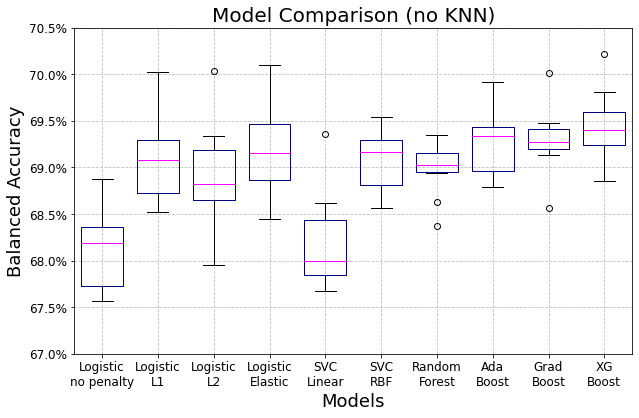

In [7]:
fig_box2, ax_box2 = plt.subplots()
df_no_knn.boxplot(ax = ax_box2, 
                  widths = 0.75,
                  boxprops = {'color':'navy'}, 
                  medianprops = {'color':'magenta'}, 
                  whiskerprops = {'color':'black'})

xtick_labels = ['Logistic\nno penalty', 'Logistic\nL1', 'Logistic\nL2', 'Logistic\nElastic', 
                'SVC\nLinear', 'SVC\nRBF',
                'Random\nForest',
                'Ada\nBoost', 'Grad\nBoost', 'XG\nBoost']
ax_box2.set_xticklabels(xtick_labels, fontsize = 12)


yticks = np.arange(0.67, 0.71, 0.005)
ax_box2.set_yticks(yticks)

ytick_labels = [f"{100*y:.1f}%" for y in yticks]
ax_box2.set_yticklabels(ytick_labels, fontsize = 12)


ax_box2.set_xlabel("Models", fontsize = 18) 
ax_box2.set_ylabel("Balanced Accuracy", fontsize = 18)
ax_box2.set_title("Model Comparison (no KNN)", fontsize = 20)

ax_box2.grid(linestyle = "dashed", 
             zorder = 200, 
             color = "#bfbfbf")

fig_box2.set_size_inches([10, 6])

# save_figures
if save_figures:
    fig_name = f"{figure_path}Model Comparison (no KNN)"
    fig_box2.savefig(f"{fig_name}.pdf", 
                         dpi = 300, 
                         bbox_inches="tight")
    fig_box2.savefig(f"{fig_name}.png", 
                         dpi = 300, 
                         bbox_inches="tight")
    fig_box2.savefig(f"{fig_name}.svg", 
                         dpi = 300, 
                         bbox_inches="tight")

In [12]:
df_scores_baseline = df_scores.agg(['mean','std']).T
df_scores_baseline

,mean,std
logi_no,0.681104,0.004342
logi_l1,0.690888,0.004488
logi_l2,0.689128,0.005518
logi_ela,0.691874,0.004887
svc_lin,0.682029,0.005109
svc_rbf,0.690747,0.003307
rfc,0.689757,0.002853
knn,0.615149,0.010608
Ada,0.692784,0.003842
grad,0.692924,0.003585


In [15]:
df_scores_baseline = df_scores_baseline.eval("above = (mean - 0.5)/std")
df_scores_baseline

,mean,std,above
logi_no,0.681104,0.004342,41.710266
logi_l1,0.690888,0.004488,42.528743
logi_l2,0.689128,0.005518,34.277218
logi_ela,0.691874,0.004887,39.262368
svc_lin,0.682029,0.005109,35.626854
svc_rbf,0.690747,0.003307,57.676746
rfc,0.689757,0.002853,66.516921
knn,0.615149,0.010608,10.854475
Ada,0.692784,0.003842,50.178643
grad,0.692924,0.003585,53.811626
